*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2ModelSel-090202LineStats/'
FileBaseName = '2ModelSel-090202LineStats'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/


最確値を書式化して文字列として返す関数
```
Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
```
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

データと解析結果を描くグラフ関数

In [5]:
############################################
def GrfLine( Xdata, Ysets, title=r'$y=ax+b$', xlim=None, ylim=None ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12,8) )
  #
  fig.subplots_adjust(left=0.12, right=0.65, top=0.90, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$x$' )
  ax1.set_ylabel( r'$y$' )
  #
  if xlim is not None:
    ax1.set_xlim( xlim )
  #
  if ylim is not None:
    ax1.set_ylim( ylim )
  #
  # y-axis
  # ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  ax1.axvline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  # x-axis
  # ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  ax1.axhline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ylabel = Yset[1]
    Ymode  = Yset[2]
    Ycolor = Yset[3]
    #
    if Ymode == 1:
      # plot / solid line
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax1.scatter( Xdata, Ydata, color=Ycolor, s=100.0, label=Ylabel )
    #
  #
  plt.title( title )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

データ点数(固定)
* モデル選択の変化を系統的に例示するため、データ点数 $n=21$ で固定する。

In [6]:
############################################
# データ点数(固定)
n = 21

データに重畳する正規ノイズ
* データに重畳する正規ノイズも平均値が0とし、標準偏差も指定した値と一致するように用意する。

In [7]:
############################################
# データに重畳する正規ノイズ
# 実際の標準偏差が1になるように規格化したものを用いる。
#
# 乱数seed
# np.random.seed( 1246 )
def Make_y_noise( sigma_noise_ ):
  #
  # y値ノイズ
  y_noise_norm = np.random.normal( loc=0, scale=1.0, size=n )
  #
  # 平均値をゼロとする
  mean_ = np.mean( y_noise_norm )
  y_noise_norm = y_noise_norm - mean_
  #
  std_ = np.std( y_noise_norm )
  #
  return y_noise_norm / std_ * sigma_noise_

直線回帰するデータは$y=ax+b$で生成し、モデル選択する候補関数として以下のものを考える。
1. $y=b$
2. $y=ax$
3. $y=ax+b$

Case 3 : 異なる重畳ノイズで。直線の様なデータの直線回帰のモデル選択(唯一のモデルが選択される例)
* $a_{\rm true}=0.75$, $b_{\rm true}=0.5$とする。
* $\sigma_{\rm{}noise}=0.40$とする。
* $x$軸の範囲: $x_{\rm{}range}=1.0$で、$-x_{\rm{}range}\leq{}x\leq+x_{\rm{}range}$

In [8]:
############################################
# Case 3 :
# 異なる重畳ノイズで。直線の様なデータの直線回帰のモデル選択(唯一のモデルが選択される例)
#
##########################################
# データの x の範囲: -x_range
x_range = 1.0
# x軸
x_data = np.linspace(-x_range,x_range, num=n, endpoint=True )
#
##########################################
# 真値: 傾き a
a_true = 0.75 # 0.3
a_true_str = r'$a_{\rm{}true}=%+.2f$' % a_true
#
# 真値: 切片
b_true = 0.5 # 0.2
b_true_str = r'$b_{\rm{}true}=%+.2f$' % b_true
#
# 真値直線
y_true = a_true * x_data + b_true
#
##########################################
# y値ノイズの標準偏差
sigma_noise = 0.4
sigma_str = r'$\sigma=%+.3f$' % sigma_noise
#

* データセットで決まる平均値
$$
\overline{x}=\frac{1}{M}\sum^{M} x_{m},
\quad
\overline{x^2}=\frac{1}{M}\sum^{M} x_{m}^{2},
\quad
\overline{xy}=\frac{1}{M}\sum^{M} x_{m}y_{m},
$$
$$
\overline{y}=\frac{1}{M}\sum^{M} y_{m},
\quad
\overline{y^2}=\frac{1}{M}\sum^{M} y_{m}^{2},
$$

In [9]:
##########################################
def Means_xydata( x_data_, y_data_ ):
  # データセットで決まる平均値
  mean_x_  = np.mean( x_data_ )
  mean_y_  = np.mean( y_data_ )
  mean_x2_ = np.mean( x_data_ * x_data_ )
  mean_y2_ = np.mean( y_data_ * y_data_ )
  mean_xy_ = np.mean( x_data_ * y_data_ )
  #
  return mean_x_, mean_y_, mean_x2_, mean_y2_, mean_xy_

* $a$, $b$の推定値と誤差 (完全平方化しているのでモデルに依存しない)
$$
a_0=\frac{\overline{xy}}{\overline{x^{2}}},
\quad
b_0=\overline{y}
$$

$$
\sigma_{a}=\frac{\sigma_{\rm noise}}{\sqrt{M\,\overline{x^2}}},
\quad
\sigma_{b}=\frac{\sigma_{\rm noise}}{\sqrt{M}},
$$

In [10]:
##########################################
def LSQM_a0b0( n_, x_data_, y_data_, sigma_noise_ ):
  #
  mean_x_, mean_y_, mean_x2_, mean_y2_, mean_xy_ = Means_xydata( x_data_, y_data_ )
  # a, bの推定値と誤差
  # (完全平方化しているのでモデルに依存しない)
  a_0_ = mean_xy_ / mean_x2_
  b_0_ = mean_y_
  sigma_a_0_ = sigma_noise_ / np.sqrt( n_ * mean_x2_ )
  sigma_b_0_ = sigma_noise_ / np.sqrt( n_ )
  #
  return a_0_, b_0_, sigma_a_0_, sigma_b_0_

* データセットで決まる各モデルの誤差関数の定数項
$$
y=b
\;\;\;
\rightarrow
\;\;\;
E_{1}=\frac{1}{2}
\left[
  \overline{y^2}
  -
  (\overline{y})^{2}
\right]
$$

$$
y=ax
\;\;\;
\rightarrow
\;\;\;
E_{2}=\frac{1}{2}
\left[
  \overline{y^2}
  -
  \frac{(\overline{xy})^{2}}{\overline{x^2}}
\right]
$$

$$
y=ax+b
\;\;\;
\rightarrow
\;\;\;
E_{3}=\frac{1}{2}
\left[
  \overline{y^2}
  -
  (\overline{y})^{2}
  -
  \frac{(\overline{xy})^{2}}{\overline{x^2}}
\right]
$$

* 各モデルの分配関数
$$
y=b
\;\;\;
\rightarrow
\;\;\;
Z_{1}
=
\left(
  \frac{1}{
    2\pi
    \sigma^{2}
  }
\right)^{\frac{M}{2}}
\exp\left[
  -\frac{M}{\sigma^2}
  E_{1}
\right]
\times
\sqrt{\frac{2\pi\sigma^2}{M}}
$$

$$
y=ax
\;\;\;
\rightarrow
\;\;\;
Z_{2}
=
\left(
  \frac{1}{
    2\pi
    \sigma^{2}
  }
\right)^{\frac{M}{2}}
\exp\left[
  -\frac{M}{\sigma^2}
  E_{2}
\right]
\times
\sqrt{\frac{2\pi\sigma^2}{M\,\overline{x^2}}}
$$

$$
y=ax+b
\;\;\;
\rightarrow
\;\;\;
Z_{3}
=
\left(
  \frac{1}{
    2\pi
    \sigma^{2}
  }
\right)^{\frac{M}{2}}
\exp\left[
  -\frac{M}{\sigma^2}
  E_{3}
\right]
\times
\sqrt{\frac{2\pi\sigma^2}{M\,\overline{x^2}}}
\times
\sqrt{\frac{2\pi\sigma^2}{M}}
$$

* 各モデルのベイズ自由エネルギー
$$
y=b
\;\;\;
\rightarrow
\;\;\;
F_{1}
=
\frac{1}{2}
\left[
  M
  \ln\left(2\pi\sigma^2\right)
  +
  \frac{2M}{\sigma^2}
  E_{1}
  -
  \ln(2\pi\sigma^2)
  +
  \ln(M)
\right]
$$

$$
y=ax
\;\;\;
\rightarrow
\;\;\;
F_{2}
=
\frac{1}{2}
\left[
  M
  \ln\left(2\pi\sigma^2\right)
  +
  \frac{2M}{\sigma^2}
  E_{2}
  -
  \ln(2\pi\sigma^2)
  +
  \ln(M)
  +
  \ln\left(\overline{x^2}\right)
\right]
$$

$$
y=ax+b
\;\;\;
\rightarrow
\;\;\;
F_{3}
=
\frac{1}{2}
\left[
  M
  \ln\left(2\pi\sigma^2\right)
  +
  \frac{2M}{\sigma^2}
  E_{3}
  -
  2\ln(2\pi\sigma^2)
  +
  2\ln(M)
  +
  \ln\left(\overline{x^2}\right)
\right]
$$

In [11]:
############################################
model_str = [ r'$y=b$', r'$y=ax$', r'$y=ax+b$' ]
model_idx = [ 1,        2,         3           ]
############################################
def Bayes_ZsBFEs( n_, x_data_, y_data_, sigma_noise_ ):
  #
  mean_x_, mean_y_, mean_x2_, mean_y2_, mean_xy_ = Means_xydata( x_data_, y_data_ )
  #
  ##########################################
  # データセットで決まる誤差関数の定数項
  # K=3 y=ax+b
  E_3 = ( mean_y2_ - mean_y_**2 - mean_xy_**2 / mean_x2_)/2
  # K=2 y=ax
  E_2 = ( mean_y2_ -              mean_xy_**2 / mean_x2_)/2
  # K=1 y=b
  E_1 = ( mean_y2_ - mean_y_**2                         )/2
  ############################################
  Z_3 = np.exp(- n_ * E_3 / sigma_noise_**2 ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / (n_ * mean_x2_) ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / n_ )
  Z_2 = np.exp(- n_ * E_2 / sigma_noise_**2 ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / (n_ * mean_x2_) )
  Z_1 = np.exp(- n_ * E_1 / sigma_noise_**2 ) * np.sqrt( 2 * np.pi * sigma_noise_**2 / n_ )
  Zs  = np.array([Z_1, Z_2, Z_3])
  ############################################
  F_3  = n_ / sigma_noise_**2 * E_3 - np.log( 2 * np.pi * sigma_noise_**2 ) + np.log( n_ ) + np.log( mean_x2_ ) / 2
  F_2  = n_ / sigma_noise_**2 * E_2 - np.log( 2 * np.pi * sigma_noise_**2 ) + np.log( n_ ) / 2 + np.log( mean_x2_ ) / 2
  F_1  = n_ / sigma_noise_**2 * E_1 - np.log( 2 * np.pi * sigma_noise_**2 ) + np.log( n_ ) / 2
  BFEs = np.array([F_1, F_2, F_3])
  #
  return Zs, BFEs

各モデルの選択確率
$$
P(K|\boldsymbol{D})\propto{}Z_K
$$

* $K=1$; $y=b$
* $K=2$; $y=ax$
* $K=3$; $y=ax+b$
$$
P(K|\boldsymbol{D})
=
\frac{Z_K}{\displaystyle\sum_{K=1}^{3}Z_K}
$$

In [12]:
############################################
def PKDs( Zs_ ):
  #
  Zs_sum_ = np.sum( Zs_ )
  #
  PKD_ = []
  #
  for Z_ in Zs_:
    PKD_.append( Z_ / Zs_sum_ )
  #
  return PKD_

* モデル選択結果の結果出力

In [13]:
############################################
def Grf_MSelection( iter_, PKD_, BFEs_, Xdata, Ysets, xlim=None, ylim=None):
  #
  # print(iter_)
  # print(PKD_)
  # print(BFEs_)
  # print(model_idx)
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure( figsize=(20,7) )
  #
  fig.subplots_adjust(left=0.08, right=0.80, top=0.95, bottom=0.12, wspace=0.35)
  #
  ##################
  # P(K|D)
  ax1 = fig.add_subplot(1,2,1)
  ax1.set_xlabel( r'Model' )
  ax1.set_ylabel( r'$P(K|D)$' )
  ax1.set_ylim( 0, 1.1 )
  #
  ax1.bar( model_idx, PKD_, tick_label=model_str, align='center', label=r'$P(K|D)$' )
  #
  legLine1, legLabel1 = ax1.get_legend_handles_labels()
  #
  # BFE
  ax2 = ax1.twinx()
  ax2.set_ylabel( r'Bayes free energy (arb. unit)' )
  #
  ax2.plot( model_idx, BFEs_, color='black', linewidth=2, marker='o',markersize=10, label='BFE' )
  #
  ax2ybot, ax2ytop = ax2.set_ylim()
  ax2ycenter = (ax2ybot + ax2ytop)/2
  ax2ywidth  = (ax2ytop - ax2ybot)/2
  ax2.set_ylim( ax2ycenter - 1.2 * ax2ywidth, ax2ycenter + 1.2 * ax2ywidth )
  #
  legLine2, legLabel2 = ax2.get_legend_handles_labels()
  #
  # title
  iter_str = "%5d : " % (iter_+1)
  plt.title( iter_str + 'Model selection (' + ModelStr + ')', fontsize=18 )
  # plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  ax1.legend(legLine1 + legLine2, legLabel1 + legLabel2,
             fontsize=20, loc=0, borderaxespad=0)
  #
  ##################
  #
  ax3 = fig.add_subplot(1,2,2)
  ax3.set_xlabel( r'$x$' )
  ax3.set_ylabel( r'$y$' )
  #
  if xlim is not None:
    ax3.set_xlim( xlim )
  #
  if ylim is not None:
    ax3.set_ylim( ylim )
  #
  # y-axis
  ax3.axvline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  # x-axis
  # ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  ax3.axhline( 0.0, 0, 1.0, color='black', linestyle='solid' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ylabel = Yset[1]
    Ymode  = Yset[2]
    Ycolor = Yset[3]
    #
    if Ymode == 1:
      # plot / solid line
      ax3.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax3.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax3.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax3.scatter( Xdata, Ydata, color=Ycolor, s=100.0, label=Ylabel )
    #
  #
  plt.title( a_true_str + ', ' + b_true_str + '; ' + y_noise_std_str, fontsize=18 )
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

* モデル選択の繰り返し回数 $N_{\rm iter}=100$

In [14]:
##########################################
# モデル選択の繰り返し回数
N_iter=10000
#
# 結果をランダムに10個出力する
Rand_iter_max = 10
Rand_iter     = np.sort( np.random.randint(0, N_iter-1, Rand_iter_max) )

 P(K|D) :$y=b$    :$y=ax$   :$y=ax+b$ :
 1      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 3      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9      :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 10     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 11     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 12     :    0.003:    0.000:    0.997: 3 : $y=ax+b$
 13     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 14     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 15     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 16     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 17     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 18     :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 19   

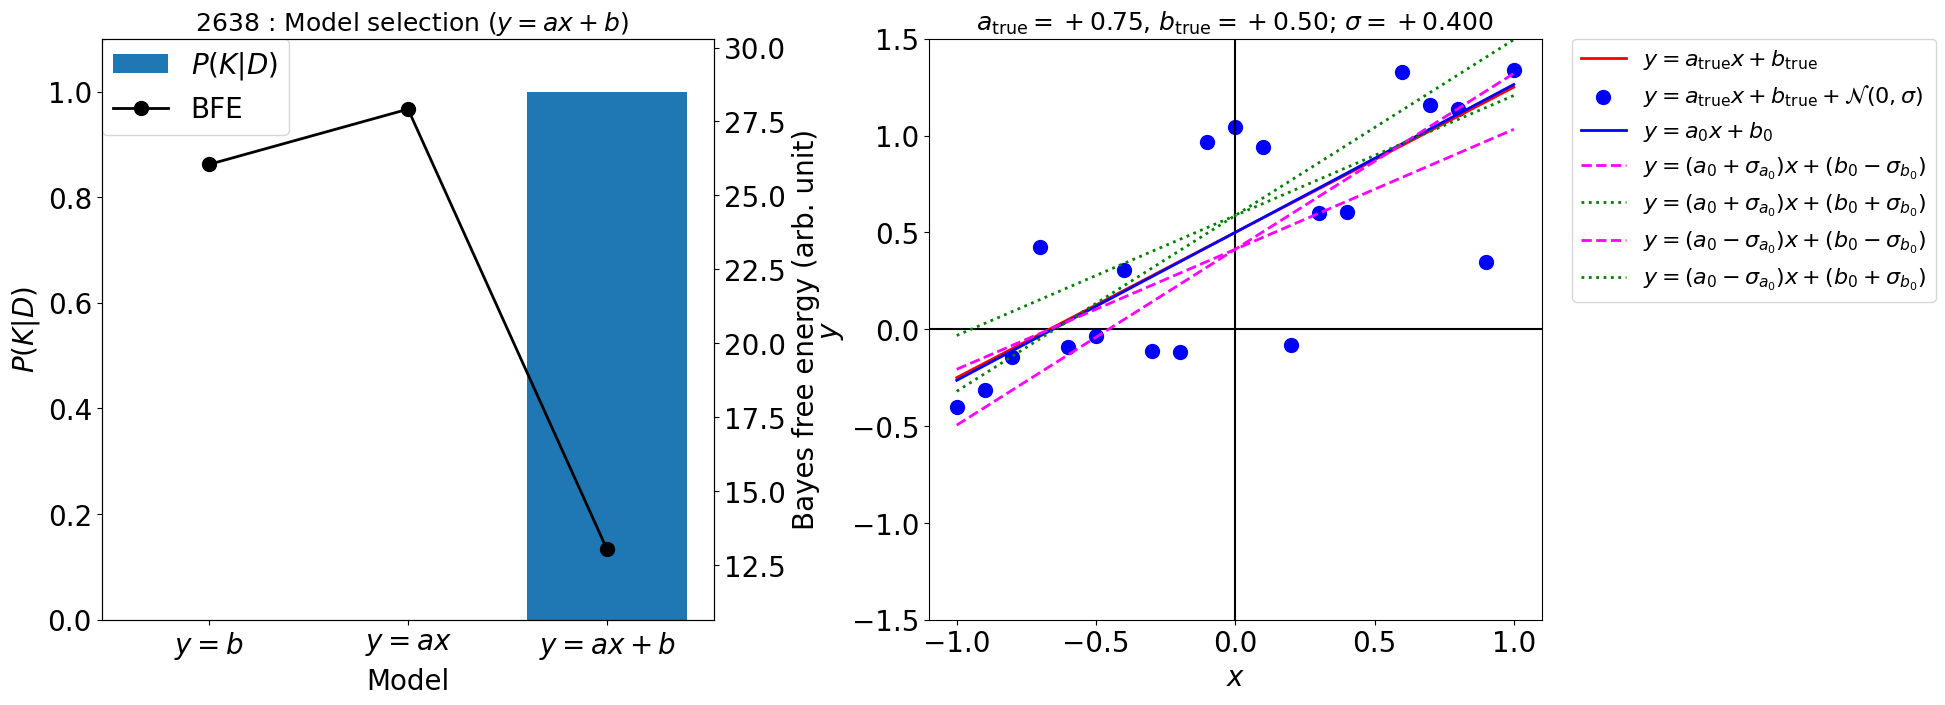

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-01.pdf
 2639   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2640   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2641   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2642   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2643   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 2644   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2645   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2646   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2647   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2648   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2649   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2650   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2651   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2652   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2653   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2654   :    0.000:    0.000:    1.000: 3 : $y=ax+b

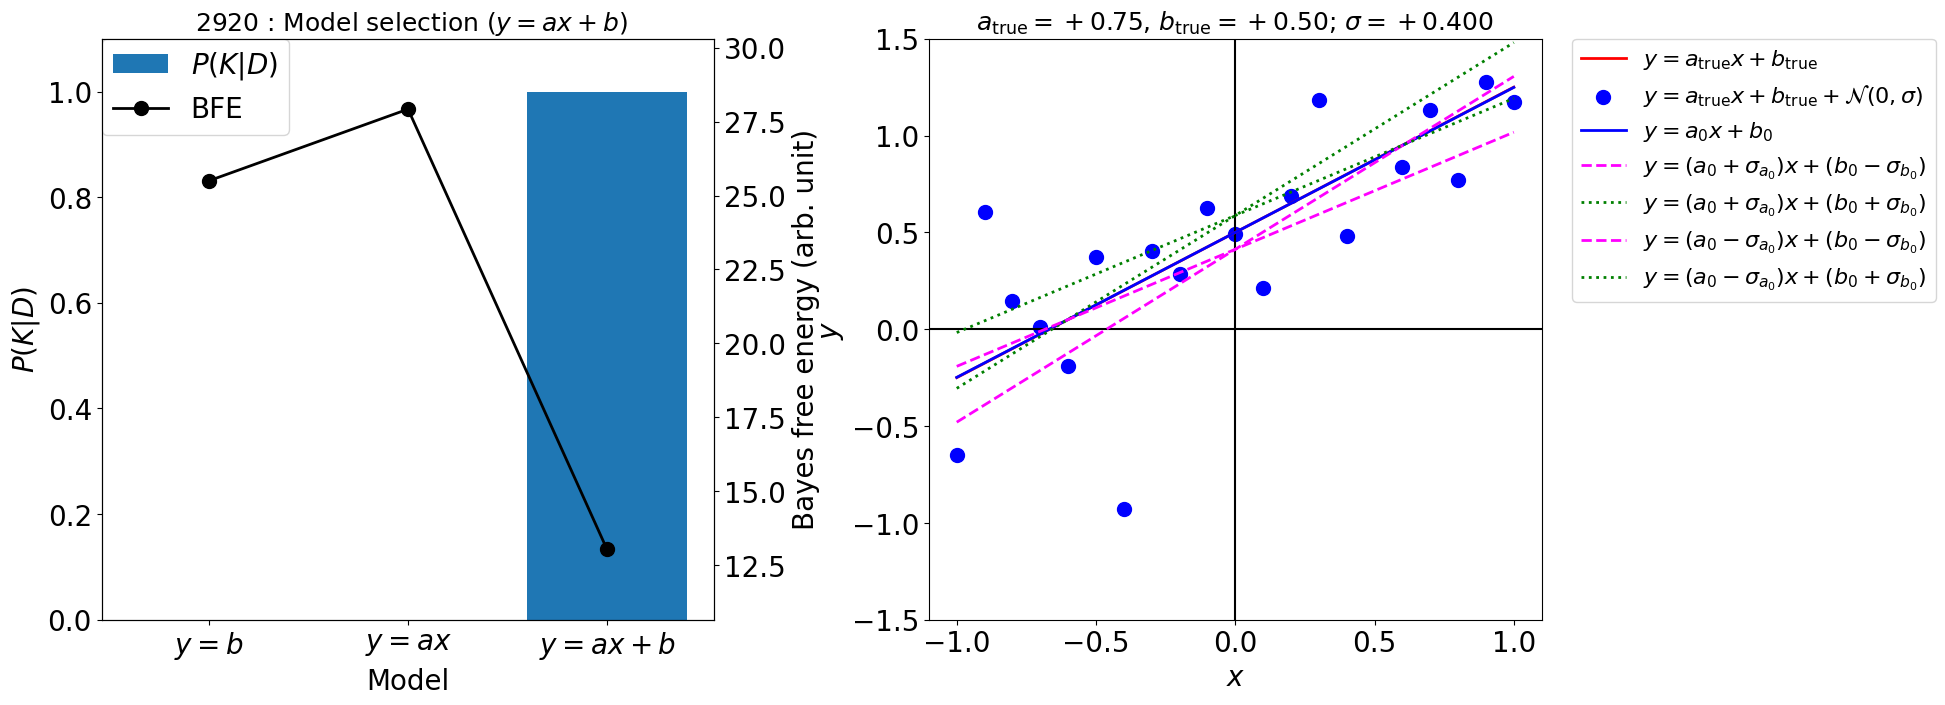

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-02.pdf
 2921   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2922   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2923   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2924   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 2925   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2926   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2927   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2928   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2929   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2930   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2931   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 2932   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2933   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2934   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2935   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 2936   :    0.000:    0.000:    1.000: 3 : $y=ax+b

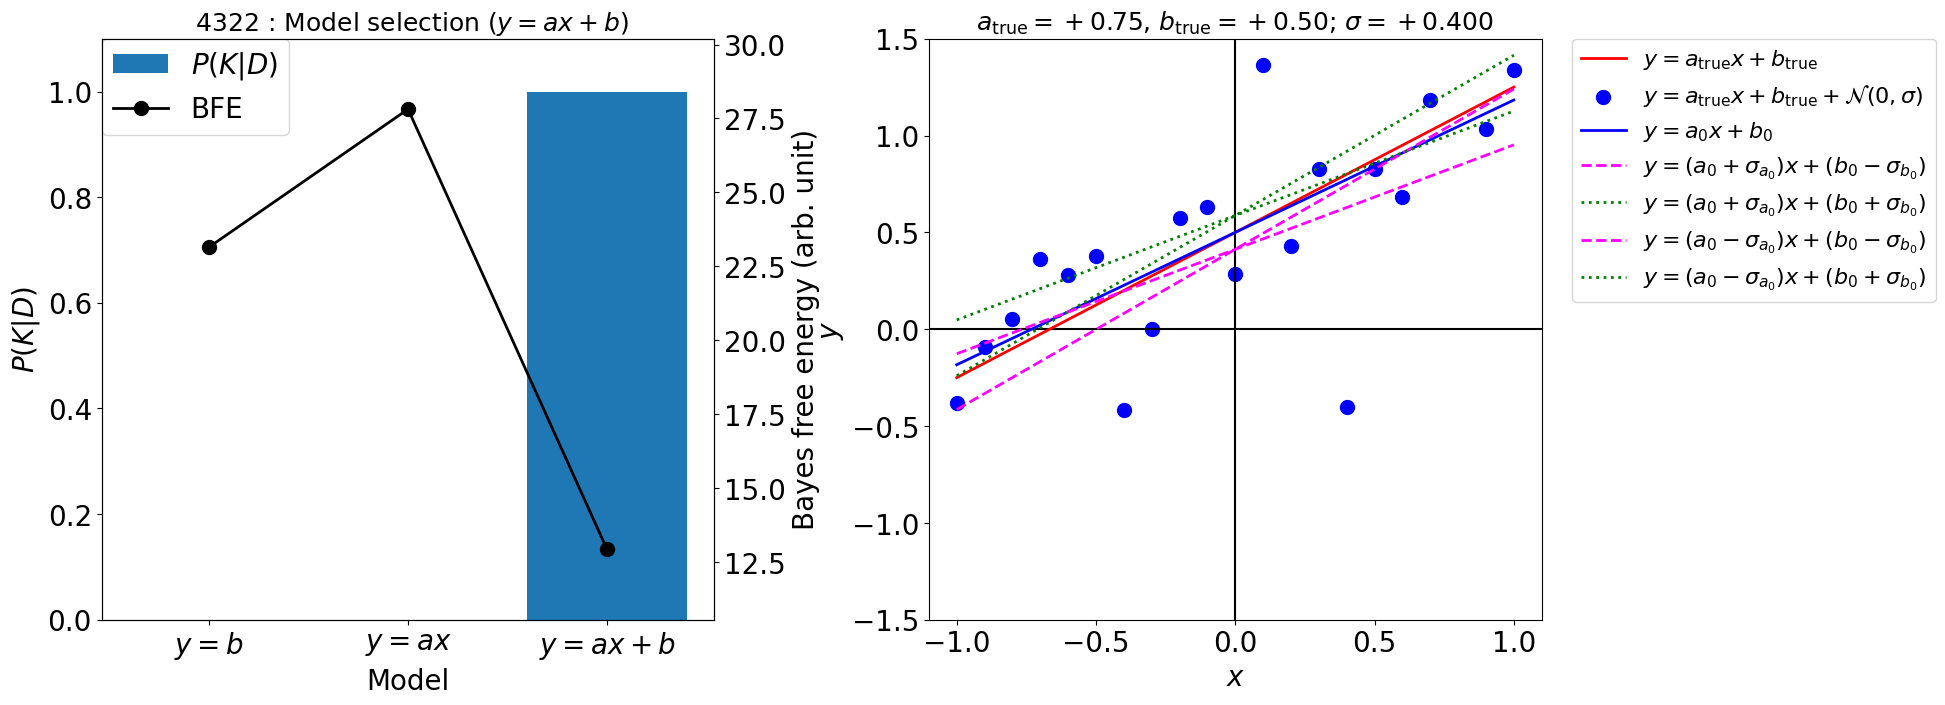

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-03.pdf
 4323   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 4324   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4325   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4326   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4327   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4328   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4329   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4330   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4331   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4332   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4333   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4334   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4335   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4336   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4337   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 4338   :    0.000:    0.000:    1.000: 3 : $y=ax+b

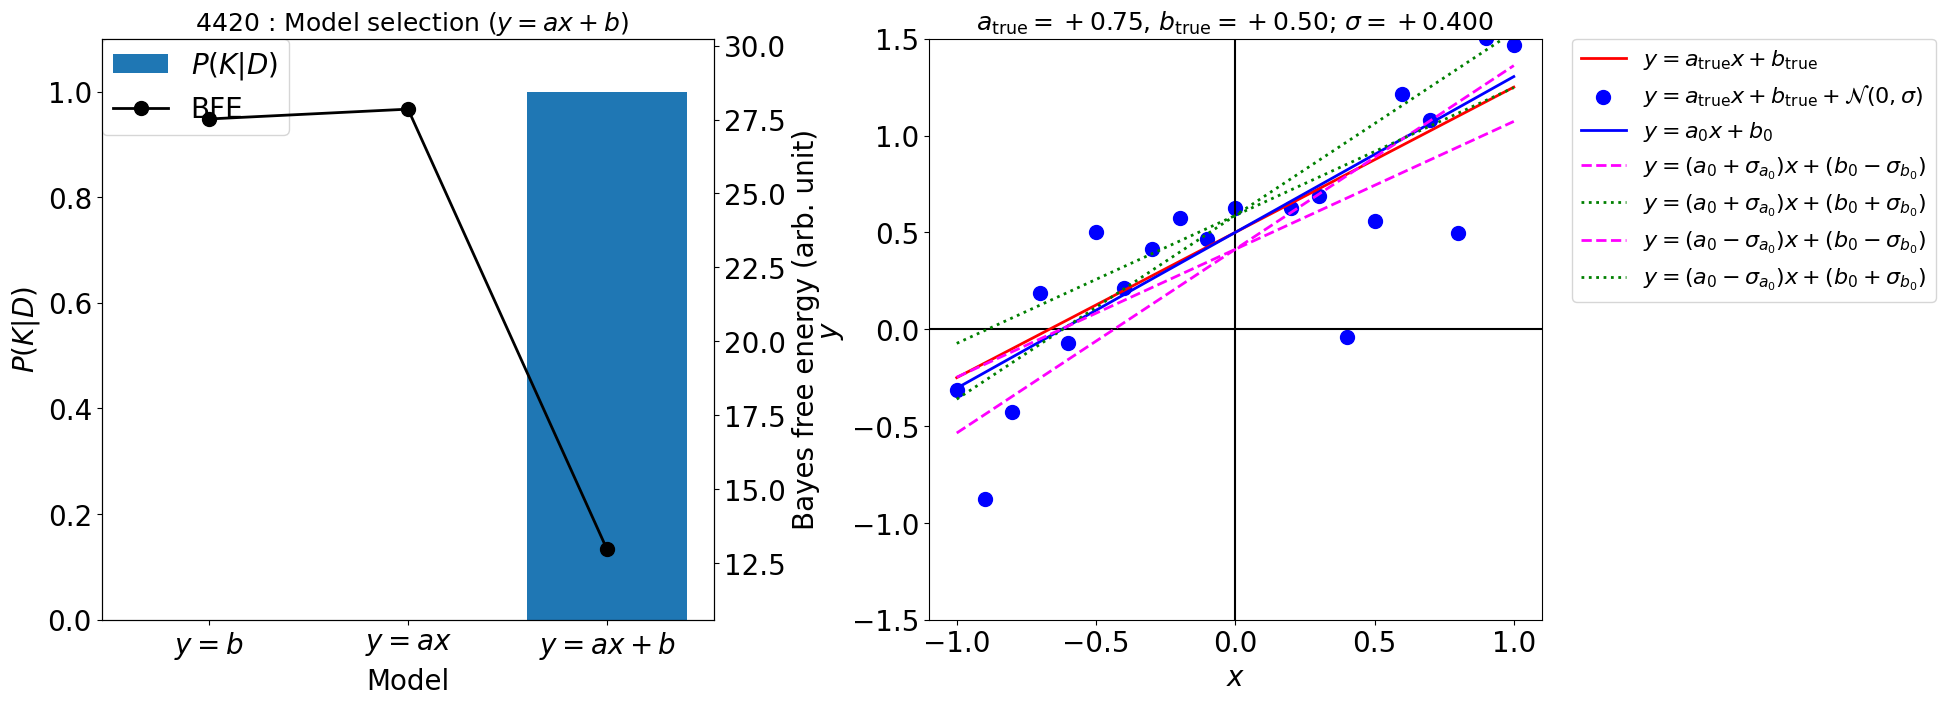

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-04.pdf
 4421   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4422   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4423   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4424   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4425   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4426   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4427   :    0.013:    0.000:    0.987: 3 : $y=ax+b$
 4428   :    0.007:    0.000:    0.993: 3 : $y=ax+b$
 4429   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4430   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4431   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 4432   :    0.003:    0.000:    0.997: 3 : $y=ax+b$
 4433   :    0.255:    0.000:    0.745: 3 : $y=ax+b$
 4434   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 4435   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 4436   :    0.000:    0.000:    1.000: 3 : $y=ax+b

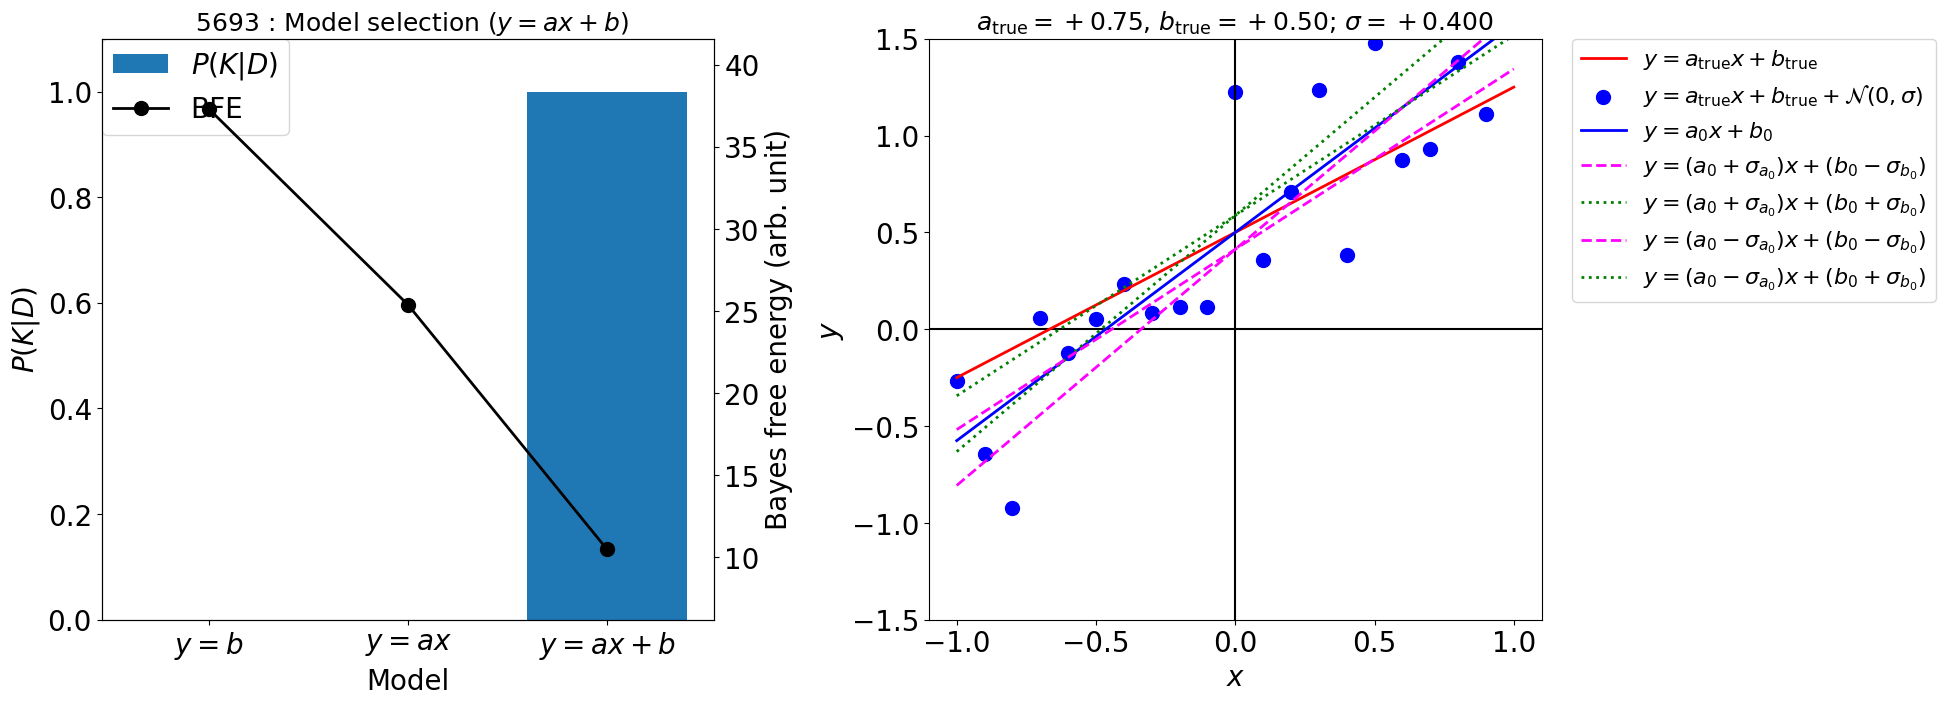

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-05.pdf
 5694   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5695   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5696   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5697   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5698   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5699   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5700   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5701   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5702   :    0.026:    0.000:    0.974: 3 : $y=ax+b$
 5703   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5704   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5705   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5706   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 5707   :    0.006:    0.000:    0.994: 3 : $y=ax+b$
 5708   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 5709   :    0.001:    0.000:    0.999: 3 : $y=ax+b

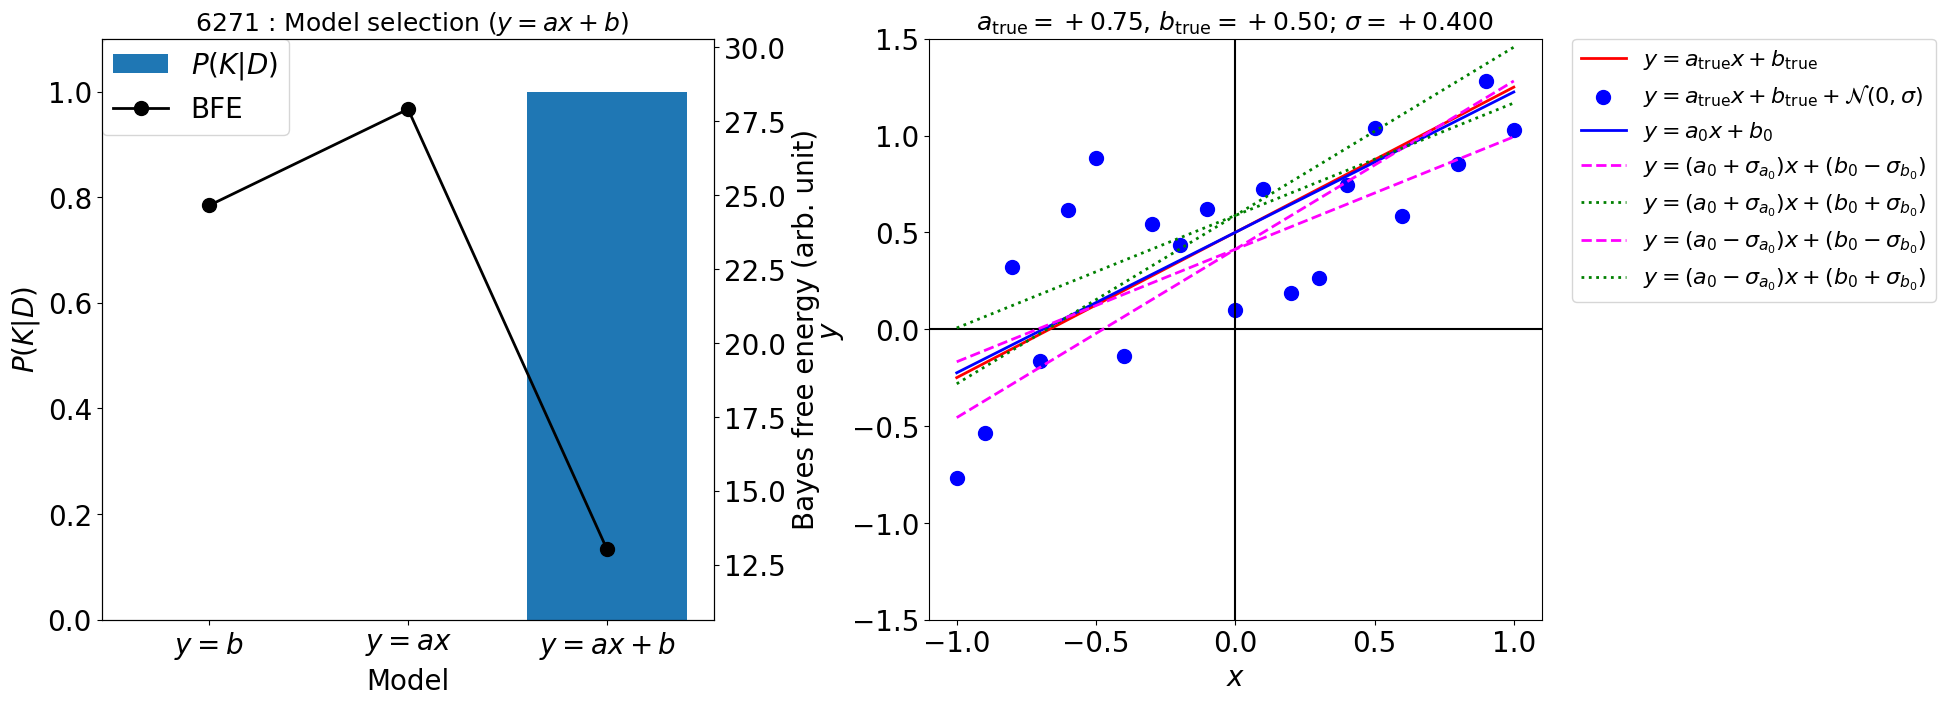

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-06.pdf
 6272   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6273   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6274   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6275   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6276   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6277   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6278   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6279   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6280   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6281   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6282   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6283   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6284   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 6285   :    0.004:    0.000:    0.996: 3 : $y=ax+b$
 6286   :    0.003:    0.000:    0.997: 3 : $y=ax+b$
 6287   :    0.089:    0.000:    0.911: 3 : $y=ax+b

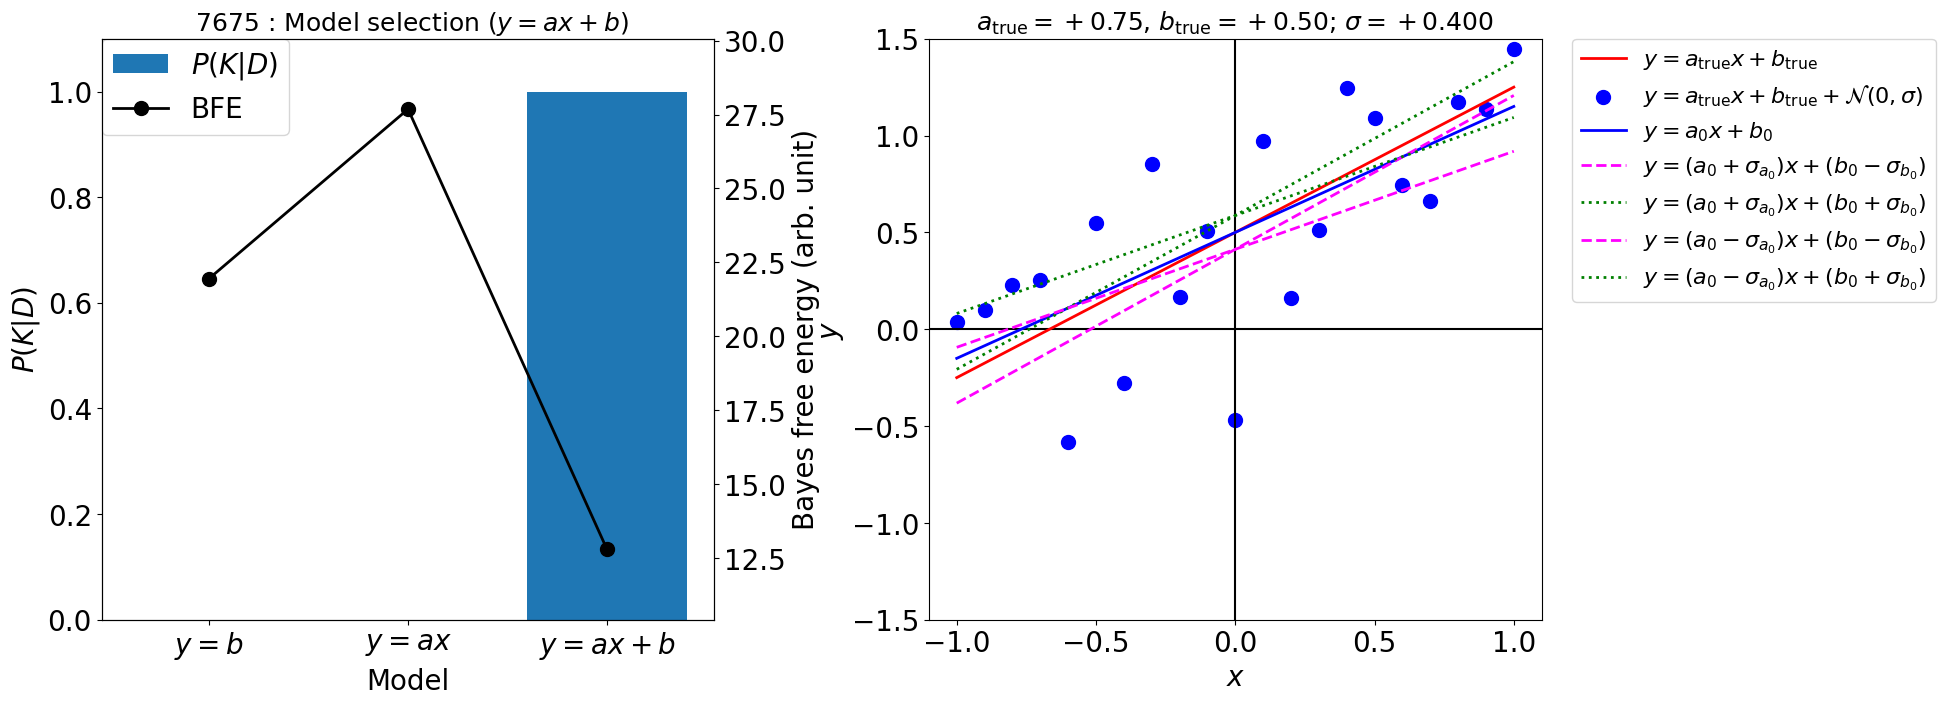

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-07.pdf
 7676   :    0.003:    0.000:    0.997: 3 : $y=ax+b$
 7677   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7678   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7679   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7680   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7681   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7682   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7683   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7684   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7685   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7686   :    0.002:    0.000:    0.998: 3 : $y=ax+b$
 7687   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7688   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7689   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 7690   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 7691   :    0.000:    0.000:    1.000: 3 : $y=ax+b

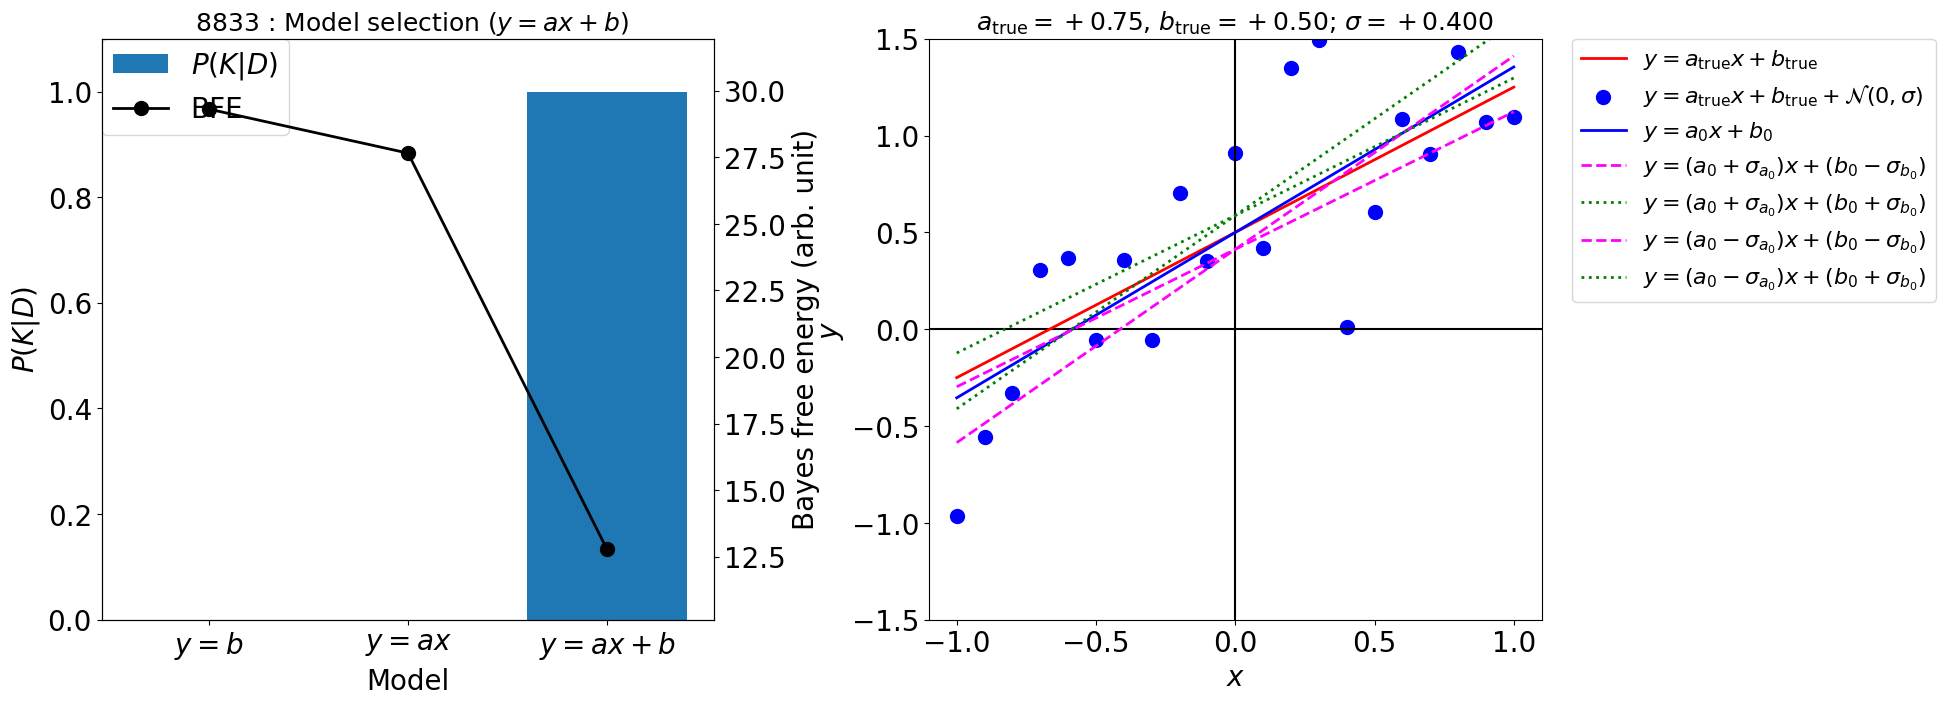

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-08.pdf
 8834   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8835   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8836   :    0.003:    0.000:    0.997: 3 : $y=ax+b$
 8837   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 8838   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8839   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8840   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8841   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8842   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8843   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8844   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8845   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 8846   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8847   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8848   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8849   :    0.007:    0.000:    0.993: 3 : $y=ax+b

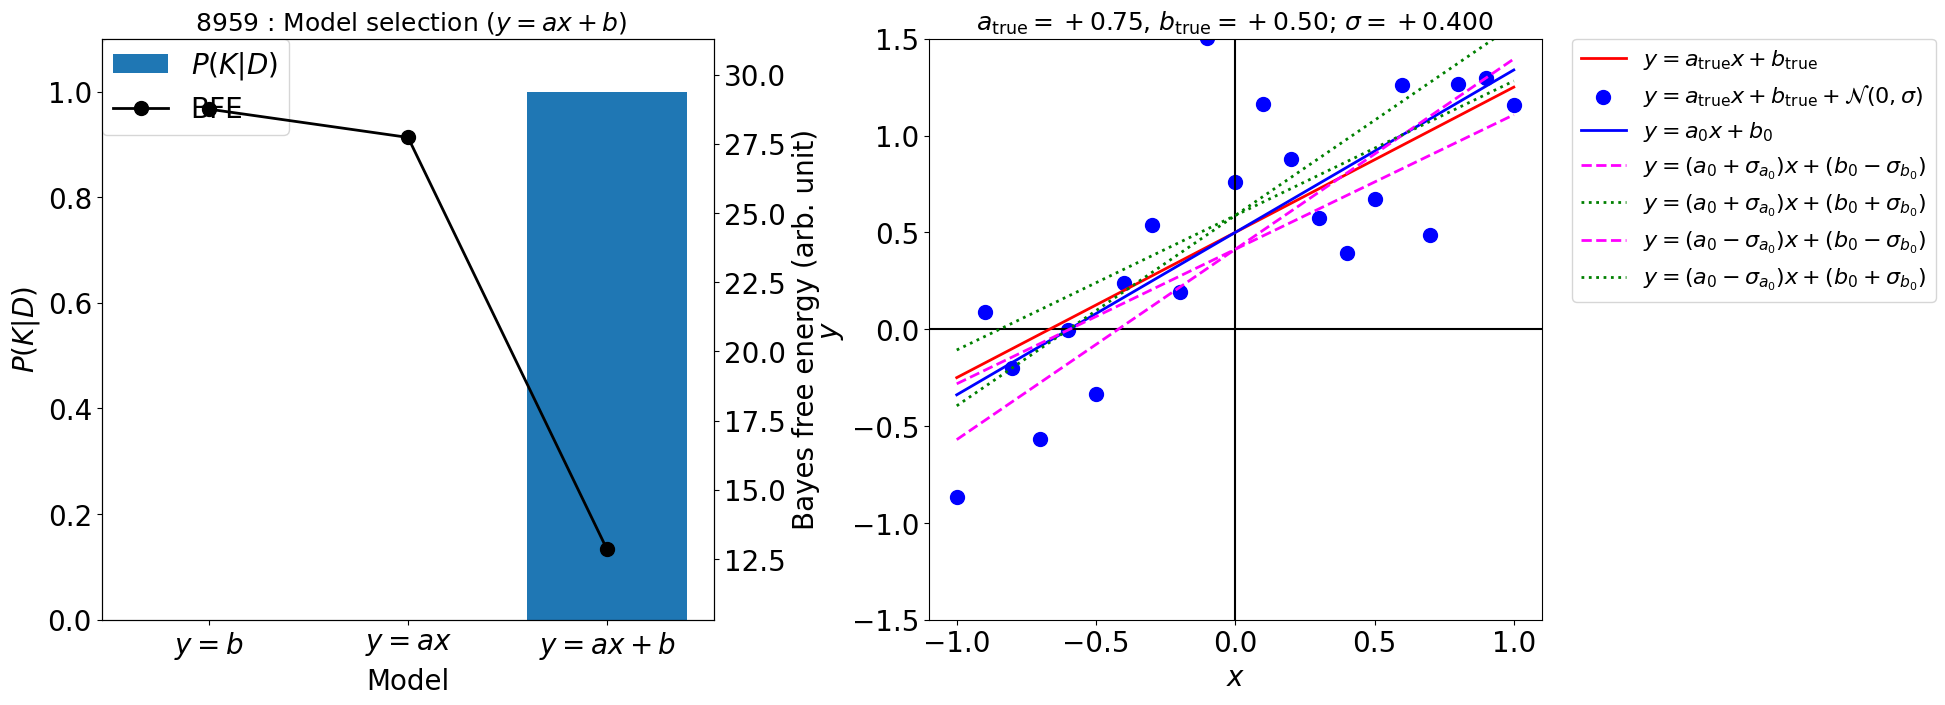

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-09.pdf
 8960   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8961   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8962   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8963   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8964   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8965   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8966   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8967   :    0.023:    0.000:    0.977: 3 : $y=ax+b$
 8968   :    0.002:    0.000:    0.998: 3 : $y=ax+b$
 8969   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8970   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8971   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8972   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 8973   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8974   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 8975   :    0.000:    0.000:    1.000: 3 : $y=ax+b

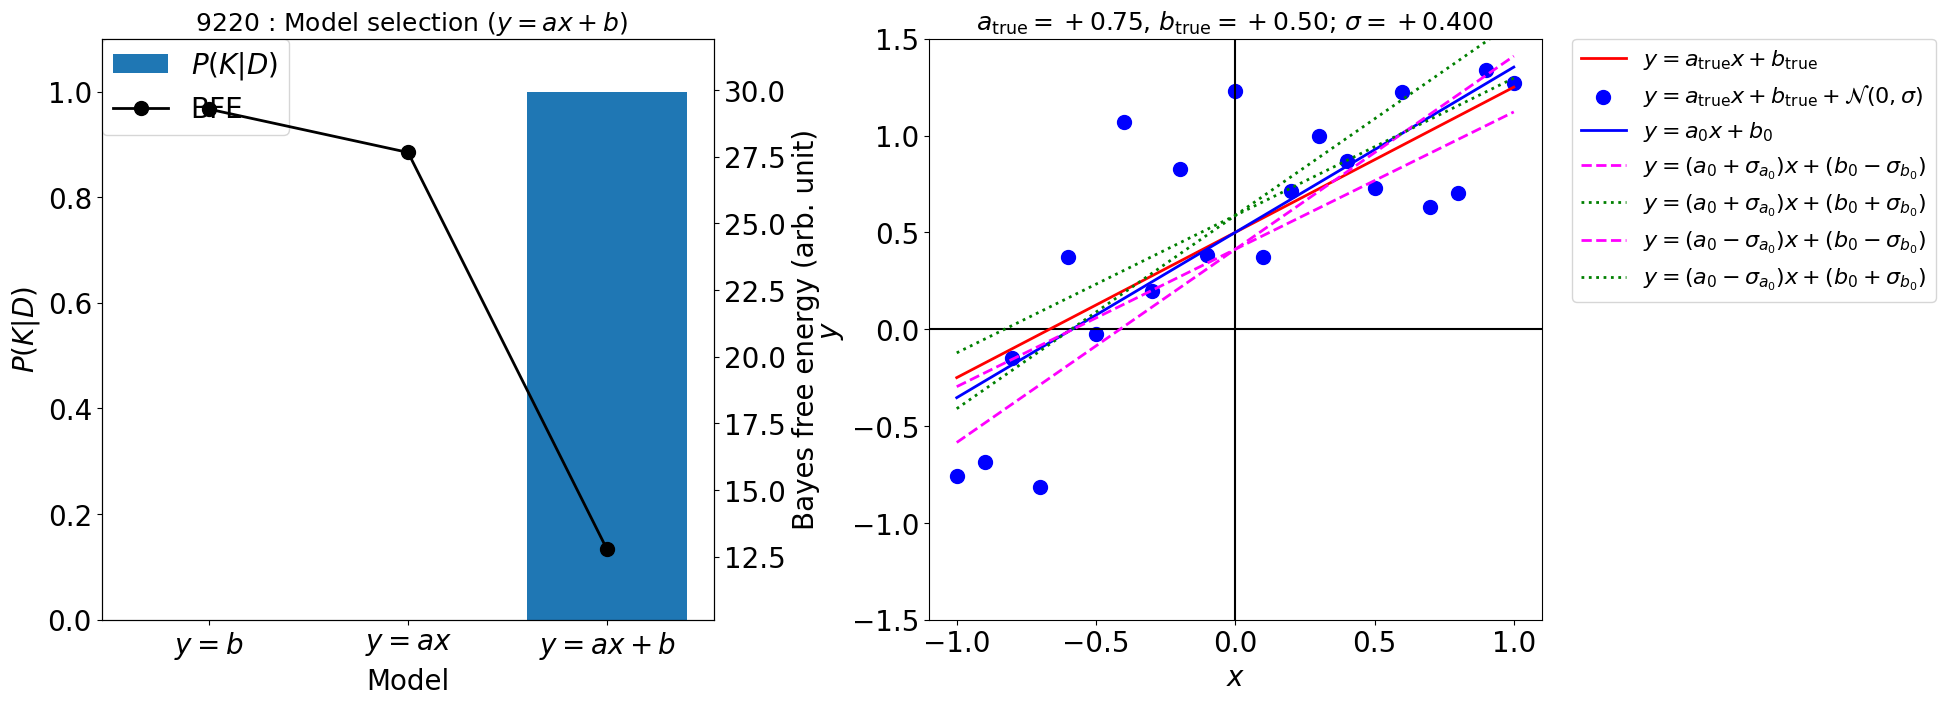

 -> d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2ModelSel-090202LineStats/2ModelSel-090202LineStats-Result-10.pdf
 9221   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9222   :    0.003:    0.000:    0.997: 3 : $y=ax+b$
 9223   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9224   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 9225   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9226   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9227   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9228   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9229   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9230   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9231   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9232   :    0.001:    0.000:    0.999: 3 : $y=ax+b$
 9233   :    0.009:    0.000:    0.991: 3 : $y=ax+b$
 9234   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9235   :    0.000:    0.000:    1.000: 3 : $y=ax+b$
 9236   :    0.000:    0.000:    1.000: 3 : $y=ax+b

In [15]:
############################################
# コンソール出力の最初の1行
print( " P(K|D) :", end="")
for str_ in model_str:
  print( "%-9s:" % str_, end="")
#
print()
#
############################################
# 繰り返しの結果の保存配列
PKD_iters  = []
BFEs_iters = []

############################################
# 繰り返しの平均を求めるための保存配列
Counts_sel = np.array( [0,   0,   0  ] )
BFE_sum    = np.array( [0.0, 0.0, 0.0] )
PKD_sum    = np.array( [0.0, 0.0, 0.0] )
Rand_iter_idx = 0
#
############################################
for iter in range(N_iter):
  #
  # ノイズの重畳した yデータ
  # y値ノイズの実際の標準偏差
  y_noise = Make_y_noise( sigma_noise )
  y_noise_std = np.std( y_noise )
  y_noise_std_str = r'$\sigma=%+.3f$' % y_noise_std
  #
  y_data = y_true + y_noise
  #
  # 分配関数 Z と、ベイズ自由エネルギー BFE
  Zs, BFEs = Bayes_ZsBFEs( n, x_data, y_data, sigma_noise )
  #
  BFEs_iters.append( BFEs )
  #
  # 各モデルの選択確率
  PKD = PKDs( Zs )
  #
  PKD_iters.append( PKD )
  #
  BFE_sum = BFE_sum + np.array( BFEs )
  PKD_sum = PKD_sum + np.array( PKD )
  #
  # モデル選択結果
  Idx_sel = np.argmax( PKD )
  Str_sel = model_str[ Idx_sel ]
  #
  Counts_sel[ Idx_sel ] = Counts_sel[ Idx_sel ] + 1
  #
  #
  # モデル選択結果の1行出力
  print( " %-6d :" % (iter+1), end="" )
  #
  for PKD_ in PKD:
    print( "    %.3f:" % PKD_, end="" )
  #
  print( "%2d : %s" % (Idx_sel+1, Str_sel), end="" )
  #
  # 結果を出力するか?
  if Rand_iter_idx < Rand_iter_max:
    if iter == Rand_iter[ Rand_iter_idx ]:
      #
      a_0, b_0, sigma_a_0, sigma_b_0 = LSQM_a0b0( n, x_data, y_data, sigma_noise )
      #
      Sel_idx_ = np.argmax( PKD )
      Sel_idx  = Sel_idx_ + 1
      ModelStr = model_str[Sel_idx_]
      #
      if Sel_idx_ == 0:
        # $K=1$; $y=b$
        y_reg  = 0.0 * x_data + b_0; # %, sigma_a_0, sigma_b_0
        y_reg1 = 0.0 * x_data + (b_0 - sigma_b_0)
        y_reg2 = 0.0 * x_data + (b_0 + sigma_b_0)
        Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                      1, 'red'     ],
                  [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',  0, 'blue'    ],
                  [y_reg,  r'$y=b_{0}$',                                             1, 'blue'   ],
                  [y_reg1, r'$y=b_{0}-\sigma_{b_{0}}$',                              2, 'magenta' ],
                  [y_reg2, r'$y=b_{0}+\sigma_{b_{0}}$',                              3, 'green'   ]
                  ]
      elif Sel_idx_ == 1:
        # $K=2$; $y=ax$
        y_reg = a_0 * x_data; # %, sigma_a_0, sigma_b_0
        y_reg1 = (a_0 + sigma_a_0) * x_data
        y_reg2 = (a_0 - sigma_a_0) * x_data
        Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                      1, 'red'     ],
                  [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',  0, 'blue'    ],
                  [y_reg,  r'$y=a_{0}x$',                                            1, 'blue'    ],
                  [y_reg1, r'$y=(a_{0}-\sigma_{a_{0}})x$',                           2, 'magenta' ],
                  [y_reg2, r'$y=(a_{0}+\sigma_{a_{0}})x$',                           3, 'green'   ]
                  ]
      elif Sel_idx_ == 2:
        # $K=3$; $y=ax+b$
        y_reg  = a_0 * x_data + b_0; # %, sigma_a_0, sigma_b_0
        y_reg1 = (a_0 + sigma_a_0) * x_data + (b_0 - sigma_b_0)
        y_reg2 = (a_0 + sigma_a_0) * x_data + (b_0 + sigma_b_0)
        y_reg3 = (a_0 - sigma_a_0) * x_data + (b_0 - sigma_b_0)
        y_reg4 = (a_0 - sigma_a_0) * x_data + (b_0 + sigma_b_0)
        Ysets = [ [y_true, r'$y=a_{\rm{}true}x+b_{\rm{}true}$',                      1, 'red'     ],
                  [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',  0, 'blue'    ],
                  [y_reg,  r'$y=a_{0}x+b_{0}$',                                      1, 'blue'    ],
                  [y_reg1, r'$y=(a_{0}+\sigma_{a_{0}})x+(b_{0}-\sigma_{b_{0}})$',    2, 'magenta' ],
                  [y_reg2, r'$y=(a_{0}+\sigma_{a_{0}})x+(b_{0}+\sigma_{b_{0}})$',    3, 'green'   ],
                  [y_reg3, r'$y=(a_{0}-\sigma_{a_{0}})x+(b_{0}-\sigma_{b_{0}})$',    2, 'magenta' ],
                  [y_reg4, r'$y=(a_{0}-\sigma_{a_{0}})x+(b_{0}+\sigma_{b_{0}})$',    3, 'green'   ]
                  ]
      #
      # グラフ
      fig = Grf_MSelection( iter, PKD, BFEs, x_data, Ysets, ylim=(-1.5,1.5) )
      # 図をpdfに保存
      pdfName = FilePath + FileBaseName + '-Result-%02d.pdf' % (Rand_iter_idx + 1)
      fig.savefig( pdfName )
      #
      print( " -> %s" % pdfName, end="" )
      Rand_iter_idx = Rand_iter_idx + 1
      #
  #
  print( )
############################################
# 繰り返し結果の平均結果の出力
BFE_sum    = BFE_sum    / N_iter
PKD_sum    = PKD_sum    / N_iter
Counts_sel = Counts_sel / N_iter
#
# モデル選択の事後確率
print( "--------:---------:---------:---------:---:---------")
print( "<P(K|D)>:", end="" )
#
for PKD_ in PKD_sum:
  print( "    %.3f:" % PKD_, end="" )
print( )
#
# MAP推定のモデル選択結果
print( "<^K>    :", end="" )
#
for Counts_sel_ in Counts_sel:
  print( "    %.3f:" % Counts_sel_, end="" )
print( )

* モデル選択の事後確率とベイズ自由エネルギーの結果の統計処理

In [16]:
PKD_iters  = np.array(PKD_iters)
BFEs_iters = np.array(BFEs_iters)
Counts_sel = np.array(Counts_sel)

Violinプロットの関数
* https://www.useful-python.com/matplotlib-violin/

In [17]:
####################################
# https://www.useful-python.com/matplotlib-violin/
#
def violin_plot( ax, data, vert = True, widths = 0.5, \
                 show_means = False, show_extrema = True, show_medians = False, \
                 color_cmeans = None, color_cmins = None, color_cmaxes = None, color_cmedians = None, \
                 bodies_color = None, bodies_edgecolor = None, bodies_alpha = None, bodies_linewidth = None ):
  #
  vp = ax.violinplot( data, vert = vert, widths = widths,
                      showmeans = show_means, showextrema = show_extrema, showmedians = show_medians )
  #
  if show_means and (color_cmeans is not None):
    vp['cmeans'].set_color( color_cmeans )
  #
  if show_extrema and (color_cmins is not None):
    vp['cmins'].set_color( color_cmins )
  #
  if show_extrema and (color_cmaxes is not None):
    vp['cmaxes'].set_color( color_cmaxes )
  #
  if show_medians and (color_cmedians is not None):
    vp['cmedians'].set_color( color_cmedians )
  #
  for body in vp['bodies']:
    #
    if bodies_color is not None:
      body.set_color( bodies_color )
    #
    if bodies_edgecolor is not None:
      body.set_edgecolor( bodies_edgecolor )
    #
    if bodies_alpha is not None:
      body.set_alpha( bodies_alpha )
    #
    if bodies_linewidth is not None:
      body.set_linewidth( bodies_linewidth )
  #
  return vp

箱ひげ図の関数
* https://www.useful-python.com/matplotlib-box/

In [18]:
####################################
# https://www.useful-python.com/matplotlib-box/
#
def box_plot( ax, data, notched = False, vert = True, labels = None, sym = 'b.',
              width = 0.5, \
              show_caps = True, show_fliers = True, show_means = True, mean_line = True, \
              whisker_x_IQR = 1.5, \
              boxes_color = 'C0', boxes_alpha = 0.5, boxes_facecolor = None, \
              boxes_edgecolor = None, boxes_linewidth = None, \
              whiskers_color = 'C0', whiskers_alpha = None, whiskers_linewidth = None, \
              whiskers_linestyle = None, \
              caps_color = 'C0', caps_alpha = None, caps_linewidth = None, \
              caps_linestyle = None, \
              medians_color = 'C1', medians_alpha = None, medians_linewidth = None, \
              medians_linestyle = 'solid', \
              means_color = 'red', means_alpha = None, means_linewidth = None, \
              means_linestyle='dashed' \
              ):
  #
  if labels is not None:
    bp = ax.boxplot( data, notched, whis=whisker_x_IQR, labels=labels, sym = sym,
                     showcaps = show_caps, showfliers = show_fliers, showmeans=show_means, meanline=mean_line,
                     patch_artist = True )
  else:
    bp = ax.boxplot( data, notched, whis=whisker_x_IQR, sym = sym,
                     showcaps = show_caps, showfliers = show_fliers, showmeans=show_means, meanline=mean_line,
                     patch_artist = True )
  #
  for obj in bp['boxes']:
    #
    if boxes_color is not None:
      obj.set_color( boxes_color )
    #
    if boxes_alpha is not None:
      obj.set_alpha( boxes_alpha )
    #
    if boxes_facecolor is not None:
      obj.set_facecolor( boxes_facecolor )
    #
    if boxes_edgecolor is not None:
      obj.set_edgecolor( boxes_edgecolor )
    #
    if boxes_linewidth is not None:
      obj.set_linewidth( boxes_linewidth )
  #
  for obj in bp['whiskers']:
    #
    if whiskers_color is not None:
      obj.set_color( whiskers_color )
    #
    if whiskers_alpha is not None:
      obj.set_alpha( whiskers_alpha )
    #
    if whiskers_linewidth is not None:
      obj.set_linewidth( whiskers_linewidth )
    #
    if whiskers_linestyle is not None:
      obj.set_linestyle( whiskers_linestyle )
  #
  for obj in bp['caps']:
    #
    if caps_color is not None:
      obj.set_color( caps_color )
    #
    if caps_alpha is not None:
      obj.set_alpha( caps_alpha )
    #
    if caps_linewidth is not None:
      obj.set_linewidth( caps_linewidth )
    #
    if caps_linestyle is not None:
      obj.set_linestyle( caps_linestyle )
  #
  for obj in bp['medians']:
    #
    if medians_color is not None:
      obj.set_color( medians_color )
    #
    if medians_alpha is not None:
      obj.set_alpha( medians_alpha )
    #
    if medians_linewidth is not None:
      obj.set_linewidth( medians_linewidth )
    #
    if medians_linestyle is not None:
      obj.set_linestyle( medians_linestyle )
  #
  for obj in bp['means']:
    #
    if means_color is not None:
      obj.set_color( means_color )
    #
    if means_alpha is not None:
      obj.set_alpha( means_alpha )
    #
    if means_linewidth is not None:
      obj.set_linewidth( means_linewidth )
    #
    if means_linestyle is not None:
      obj.set_linestyle( means_linestyle )
  #
  return bp

$P(K|\boldsymbol{D})$の複数回トライの統計処理

In [19]:
############################################
def Grf_PKDStats( PKD_iters, Counts_sel ):
  #
  PKD_means  = [ np.mean(PKD_iters[:,0]), np.mean(PKD_iters[:,1]), np.mean(PKD_iters[:,2]) ]
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure( figsize=(7,7) )
  #
  fig.subplots_adjust(left=0.15, right=0.95, top=0.92, bottom=0.12)
  #
  # P(K|D)
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'Model' )
  ax1.set_ylabel( r'$P(K|D)$' )
  ax1.set_ylim( 0, 1.1 )
  #
  ax1.bar( model_idx, PKD_means, tick_label=model_str, align='center', label=r'$\overline{P(K|D)}$', alpha=0.5 )
  #
  vi = violin_plot( ax1, PKD_iters, show_means=False, show_medians=False, show_extrema=False,
                      bodies_color = 'magenta' )
  #
  bp = box_plot( ax1, PKD_iters, notched = True, show_fliers = False, labels = model_str,
                 boxes_color = 'green', boxes_alpha = 0.25, boxes_facecolor = 'green',
                 boxes_edgecolor = 'green', boxes_linewidth = 1.5,
                 whiskers_color = 'green', whiskers_linewidth = 1.5,
                 caps_color = 'green', caps_linewidth = 1.5,
                 medians_color = 'blue', medians_linewidth = 2.5,
                 means_color = 'red', means_linewidth = 2.5
              )
  #
  # Counts_sel
  ax1.text( 1, 0.02, '%.4f' % Counts_sel[0], horizontalalignment='center', fontsize=22 )
  ax1.text( 2, 0.02, '%.4f' % Counts_sel[1], horizontalalignment='center', fontsize=22 )
  ax1.text( 3, 0.02, '%.4f' % Counts_sel[2], horizontalalignment='center', fontsize=22 )
  #
  # title
  plt.title( 'Model selection (iters = %d)' % N_iter )
  # plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  plt.legend()
  #
  plt.show()
  #
  return fig

C:\Users\iakai\AppData\Local\Temp\ipykernel_27580\4192018923.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot( data, notched, whis=whisker_x_IQR, labels=labels, sym = sym,


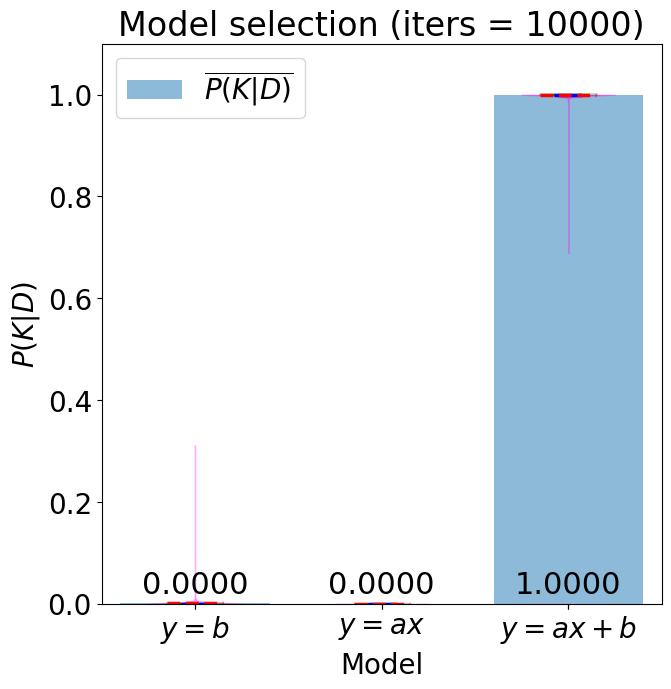

In [20]:
############################################
fig = Grf_PKDStats( PKD_iters, Counts_sel )
# 図をpdfに保存
pdfName = FilePath + FileBaseName + '-PKDstats-01.pdf'
fig.savefig( pdfName )

$P(K|\boldsymbol{D})$とBFEの複数回トライの統計処理

In [21]:
############################################
def Grf_MSelectionStats( PKD_iters, BFEs_iters, Counts_sel ):
  #
  PKD_means = [ np.mean(PKD_iters[:,0]),  np.mean(PKD_iters[:,1]),  np.mean(PKD_iters[:,2])  ]
  BFE_means = [ np.mean(BFEs_iters[:,0]), np.mean(BFEs_iters[:,1]), np.mean(BFEs_iters[:,2]) ]
  BFE_stds  = [ np.std(BFEs_iters[:,0]),  np.std(BFEs_iters[:,1]),  np.std(BFEs_iters[:,2]) ]
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure( figsize=(8,7) )
  #
  fig.subplots_adjust(left=0.12, right=0.90, top=0.92, bottom=0.12)
  #
  #####################
  # P(K|D)
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'Model' )
  ax1.set_ylabel( r'$P(K|D)$' )
  ax1.set_ylim( 0, 1.1 )
  #
  ax1.bar( model_idx, PKD_means, tick_label=model_str, align='center', label=r'$\overline{P(K|D)}$',
           color='blue', alpha=0.25 )
  #
  vi = violin_plot( ax1, PKD_iters, show_means=False, show_medians=False, show_extrema=False,
                      bodies_color = 'blue' )
  #
  # Counts_sel
  ax1.text( 1, 0.02, '%.4f' % Counts_sel[0], horizontalalignment='center', fontsize=22 )
  ax1.text( 2, 0.02, '%.4f' % Counts_sel[1], horizontalalignment='center', fontsize=22 )
  ax1.text( 3, 0.02, '%.4f' % Counts_sel[2], horizontalalignment='center', fontsize=22 )
  #
  legLine1, legLabel1 = ax1.get_legend_handles_labels()
  #
  #####################
  # BFE
  ax2 = ax1.twinx()
  ax2.set_ylabel( r'Bayes free energy (arb. unit)' )
  #
  # ax2.plot( model_idx, BFE_means, color='black', linewidth=2, marker='o',markersize=10, label='BFE' )
  ax2.plot( model_idx, BFE_means, color='red', linewidth=2, marker='o',markersize=10, label='BFE' )
  vi2 = violin_plot( ax2, BFEs_iters, show_means=False, show_medians=False, show_extrema=False,
                      bodies_color = 'red' )
  #
  ax2ybot, ax2ytop = ax2.set_ylim()
  ax2ycenter = (ax2ybot + ax2ytop)/2
  ax2ywidth  = (ax2ytop - ax2ybot)/2
  ax2.set_ylim( ax2ycenter - 1.1 * ax2ywidth, ax2ycenter + 1.1 * ax2ywidth )
  #
  legLine2, legLabel2 = ax2.get_legend_handles_labels()
  #
  # title
  plt.title( 'Model selection (iters = %d)' % N_iter )
  # plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  plt.legend(legLine1 + legLine2, legLabel1 + legLabel2,
             fontsize=20, loc=0, borderaxespad=0)
  #
  plt.show()
  #
  return fig

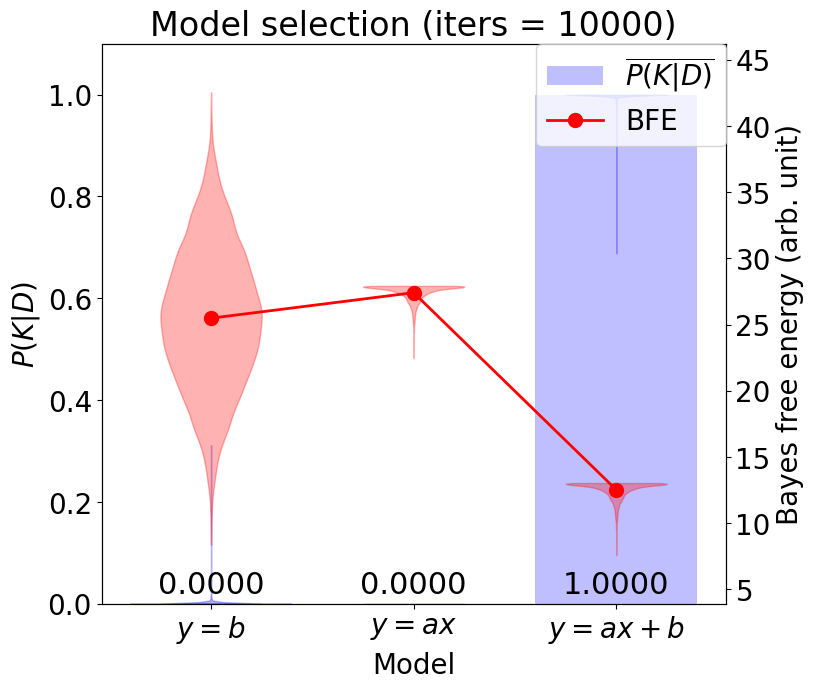

In [22]:
############################################
fig = Grf_MSelectionStats( PKD_iters, BFEs_iters, Counts_sel )
# 図をpdfに保存
pdfName = FilePath + FileBaseName + '-MSstats-01.pdf'
fig.savefig( pdfName )